In [1]:
import parser
import sys
import os
import matplotlib.pyplot as plt
import pysam

# Get the directory one level up
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)
import plot_enrichment_profile
import utils

In [2]:
utils.generate_centered_windows_bed(
    '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    '/clusterfs/nilah/oberon/datasets/ctcf_peaks/',
    1000
)
    

IsADirectoryError: [Errno 21] Is a directory: '/clusterfs/nilah/oberon/datasets/ctcf_peaks/'

In [4]:
# with open ('/clusterfs/nilah/oberon/datasets/ctcf_peaks/1000bp windows ENCFF797SDL.chm13v1.1.bed') as f:
#     for line in f:
#         print(line)
#         break

chr14	100579555	100581555	.	1000	.	500.78821	-1.00000	4.81020	244



In [2]:
num_cores = 32
print(parser.parse_bam_modkit_pileup(
    input_file='/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    output_path='/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context',
    output_name='mod_mappings.01.ENCFF797SDL',
    ref_genome='/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    bed_file='/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    thresh=0.9,
    window_size=500,
    cores=num_cores
))

Processing from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code m
> parsed user-input threshold 0.9 for mod-code a
> parsing BED at /clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.windowed.bed
> processed 41861 BED lines
> calculated chunk size: 48, interval size 100000, processing 4800000 positions concurrently
> Using filter threshold 0.9 for mod code m.
> Using filter threshold 0.9 for mod code a.
> Done, processed 12545696 rows. Processed ~45249 reads and skipped zero reads.


0


In [8]:
num_cores = 32
print(parser.parse_bam_modkit_pileup(
    input_file='/clusterfs/nilah/oberon/datasets/dimelo_5th-floor/mod_mappings.retagged.sorted.bam',
    output_path='/clusterfs/nilah/oberon/datasets/dimelo_5th-floor/',
    output_name='mod_mappings.ENCFF797SDL',
    ref_genome='/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    bed_file='/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    thresh=0.9,
    window_size=500,
    cores=num_cores
))

Processing from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code m
> parsed user-input threshold 0.9 for mod-code a
> parsing BED at /clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.windowed.bed
> processed 41861 BED lines
> calculated chunk size: 48, interval size 100000, processing 4800000 positions concurrently
> Using filter threshold 0.9 for mod code m.
> Using filter threshold 0.9 for mod code a.
> Done, processed 21602446 rows. Processed ~122044 reads and skipped zero reads.


0


In [ ]:
!../dependencies/modkit/modkit update-tags \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam \
--threads 32 --mode ambiguous \
--log-filepath /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/update_tags.log

> 8046 Updating ModBAM                                                          

In [ ]:
!../dependencies/modkit/modkit adjust-mods \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.ma.sorted.bam \
--convert Z m --convert Y a \
--log-filepath /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/adjust_mods.log

> Converting Z to m
> Converting Y to a
▸▹▹▹▹ [00:01:58] 29839 Adjusting modBAM                                         

In [2]:
!module load samtools && samtools index \
/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.ma.sorted.bam

In [4]:
ctcf_modbam = pysam.AlignmentFile('/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam')

In [5]:
for read in ctcf_modbam.fetch('chr1',1000000,2000000):
    print(read.modified_bases)
    break

{('A', 1, 'Y'): [(5, 0), (6, 0), (9, 0), (18, 0), (20, 0), (22, 0), (26, 0), (29, 0), (34, 0), (39, 0), (42, 0), (50, 0), (52, 0), (58, 0), (60, 0), (66, 0), (69, 0), (75, 0), (80, 0), (83, 0), (108, 0), (109, 0), (110, 0), (111, 0), (112, 0), (114, 0), (117, 0), (122, 0), (123, 0), (124, 0), (125, 0), (127, 0), (130, 0), (139, 0), (141, 0), (144, 0), (154, 0), (155, 0), (156, 0), (157, 0), (164, 0), (167, 0), (170, 0), (177, 0), (185, 0), (193, 0), (197, 0), (200, 0), (201, 0), (203, 0), (205, 0), (223, 0), (229, 0), (231, 0), (233, 0), (237, 0), (238, 0), (243, 0), (245, 0), (258, 0), (262, 0), (270, 0), (271, 0), (273, 0), (278, 0), (281, 0), (282, 0), (284, 0), (287, 0), (290, 0), (296, 0), (301, 0), (302, 0), (304, 0), (305, 0), (309, 0), (312, 0), (314, 0), (317, 0), (319, 0), (320, 0), (322, 0), (323, 0), (325, 0), (326, 0), (329, 0), (330, 0), (334, 0), (335, 0), (336, 0), (338, 0), (339, 0), (343, 0), (347, 0), (349, 0), (352, 0), (353, 0), (356, 0), (363, 0), (367, 0), (379, 

In [3]:
num_cores = 32
print(parser.parse_bam_modkit_pileup(
    input_file='/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.ma.sorted.bam',
    output_path='/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/',
    output_name='deep_ctcf_mod_mappings_merge.retagged.sorted.ENCFF797SDL',
    ref_genome='/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/genomes/chm13.draft_v1.0.fasta',
    bed_file='/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.0.bed',
    thresh=0.9,
    window_size=500,
    cores=num_cores
))

Processing from ENCFF797SDL.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.0.windowed.bed
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code a
> parsed user-input threshold 0.9 for mod-code m
> parsing BED at /clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.0.windowed.bed
> processed 41861 BED lines
> calculated chunk size: 48, interval size 100000, processing 4800000 positions concurrently
> Using filter threshold 0.9 for mod code a.
> Using filter threshold 0.9 for mod code m.
> Done, processed 0 rows. Processed ~0 reads and skipped ~869470 reads.


0


In [2]:
print(parser.parse_bam_modkit_extract(
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context',
    'mod_mappings.01.parser',
    'chr1:0-250000000',
    '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    0.9,
))

> parsed user-input threshold 0.9 for mod-code a
> parsed user-input threshold 0.9 for mod-code m
> specifying a motif (including --cpg) outputs only mapped sites
> found BAM index, processing reads in 100000 base pair chunks
> processed 29354 reads, 3551113 rows, skipped ~294 reads, failed ~0 reads


0


In [5]:
accessibility_pileup = plot_enrichment_profile.extract_vector_from_bedmethyl(
    bedmethyl_file = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL.sorted.bed.gz',
    bed_file = '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    mod_name = 'GCH',
    window_size = 500,
)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed


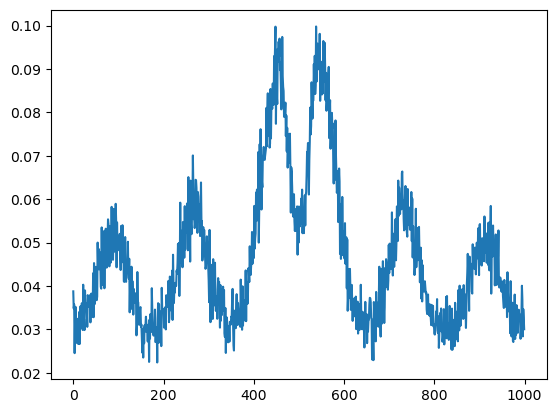

In [6]:
plt.plot(accessibility_pileup)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

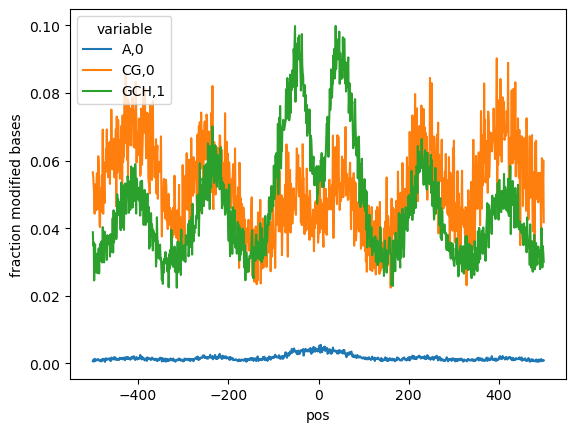

In [13]:
plot_enrichment_profile.plot_enrichment_profile_vary_mod(
    mod_file_name='/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL.sorted.bed.gz',
    bed_file_name= '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    window_size=500,
    mod_names=['A,0','CG,0','GCH,1'],
)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

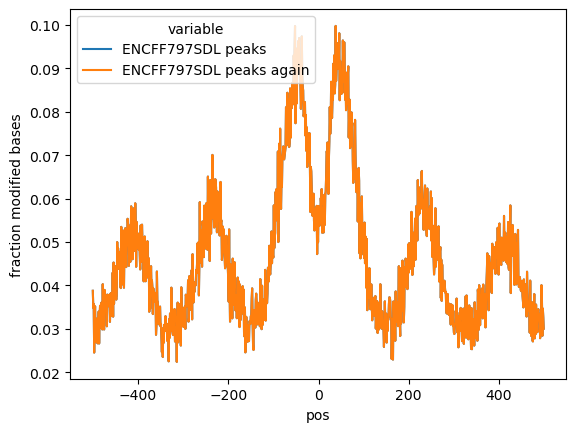

In [15]:
plot_enrichment_profile.plot_enrichment_profile_vary_regions(
    mod_file_name='/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL.sorted.bed.gz',
    bed_file_names= ['/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
                     '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed'],
    window_size=500,
    mod_name='GCH,1',
    sample_names=['ENCFF797SDL peaks','ENCFF797SDL peaks again']
)

Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed
Loading regions from ENCFF797SDL.chm13v1.1.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL.chm13v1.1.windowed.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

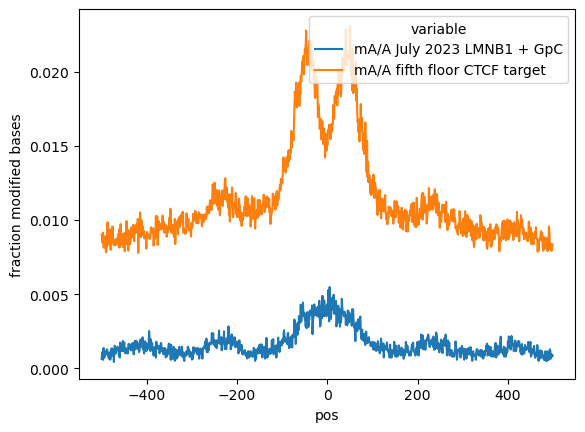

In [16]:
plot_enrichment_profile.plot_enrichment_profile_vary_experiments(
    mod_file_names=['/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.ENCFF797SDL.sorted.bed.gz',
                   '/clusterfs/nilah/oberon/datasets/dimelo_5th-floor/mod_mappings.ENCFF797SDL.sorted.bed.gz',
                   '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.ENCFF797SDL.bed.gz'],
    bed_file_name= '/clusterfs/nilah/oberon/datasets/ctcf_peaks/ENCFF797SDL.chm13v1.1.bed',
    window_size=500,
    mod_name='A,0',
    sample_names=['mA/A July 2023 LMNB1 + GpC','mA/A fifth floor CTCF target','mA/A Nature paper deep CTCF']
)